In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("train_ctrUa4K.csv")

train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Cleaning

In [3]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
train.shape

(614, 13)

In [5]:
train.columns = ['id', 'gender', 'married', 'family', 'education', 'selfemployed', 'appin', 'coappin', 'loanam', 'loanterm',
                'credit', 'property', 'status']

train.head()

,id,gender,married,family,education,selfemployed,appin,coappin,loanam,loanterm,credit,property,status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## status

In [6]:
train.status.replace({'Y' : 1, 'N' : 0}, inplace=True)

train.head()

,id,gender,married,family,education,selfemployed,appin,coappin,loanam,loanterm,credit,property,status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


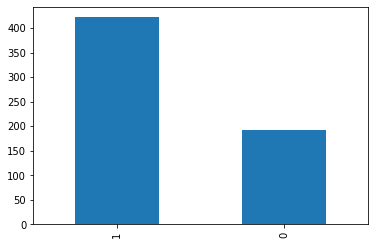

In [7]:
train.status.value_counts().plot.bar()

## gender

In [8]:
train.gender.replace({'Male' : 0, 'Female' : 1}, inplace=True)

train.tail(10)

,id,gender,married,family,education,selfemployed,appin,coappin,loanam,loanterm,credit,property,status
604,LP002959,1.0,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,1
605,LP002960,0.0,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,0
606,LP002961,0.0,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,1
607,LP002964,0.0,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,1
608,LP002974,0.0,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,1
609,LP002978,1.0,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,0.0,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,0.0,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,0.0,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1
613,LP002990,1.0,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,0


status    0    1
gender          
0.0     150  339
1.0      37   75


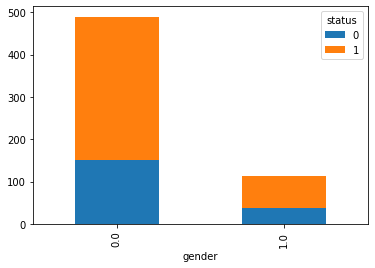

In [9]:
gender = train.groupby('gender')['status'].value_counts().unstack()
print(gender)
gender.plot.bar(stacked=True)

In [10]:
print('Male ', 339 / ( 339 + 150))
print('Female ', 75 / ( 75 + 37))

Male  0.6932515337423313
Female  0.6696428571428571


married   No  Yes
gender           
0.0      130  357
1.0       80   31


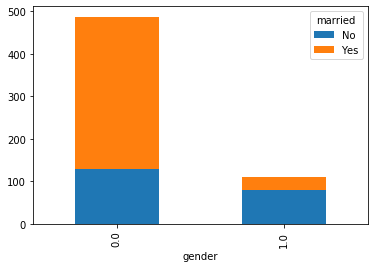

In [11]:
gender = train.groupby('gender')['married'].value_counts().unstack()
print(gender)
gender.plot.bar(stacked=True)

In [12]:
print('Male ', 357 / ( 357 + 130))
print('Female ', 31 / ( 31 + 79))

Male  0.7330595482546202
Female  0.2818181818181818


family    0   1   2  3+
gender                 
0.0     258  82  92  45
1.0      80  19   7   3


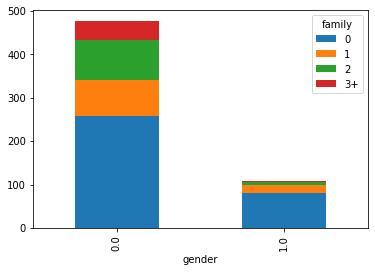

In [13]:
gender = train.groupby('gender')['family'].value_counts().unstack()
print(gender)
gender.plot.bar(stacked=True)

In [14]:
print('Male individuals', 258 / ( 258 + 82 + 92 + 45))
print('Female individuals', 80 / ( 80 + 19 + 7 + 3))

Male individuals 0.5408805031446541
Female individuals 0.7339449541284404


In [15]:
print('Male 3+', 45 / ( 258 + 82 + 92 + 45))
print('Female 3+', 3 / ( 80 + 19 + 7 + 3))

Male 3+ 0.09433962264150944
Female 3+ 0.027522935779816515


Cannor predict gender w.r.t. family

selfemployed   No  Yes
gender                
0.0           402   63
1.0            89   15


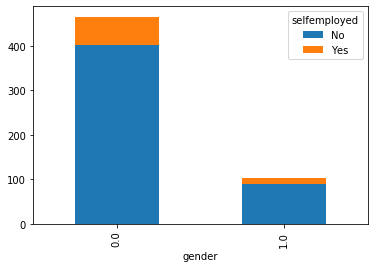

In [16]:
gender = train.groupby('gender')['selfemployed'].value_counts().unstack()
print(gender)
gender.plot.bar(stacked=True)

In [17]:
print('Male',63 / (63 + 402))
print('Female',15 / (15 + 89))

Male 0.13548387096774195
Female 0.14423076923076922


education  Graduate  Not Graduate
gender                           
0.0             376           113
1.0              92            20


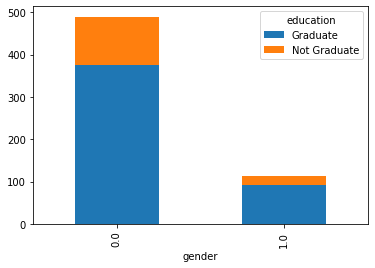

In [18]:
gender = train.groupby('gender')['education'].value_counts().unstack()
print(gender)
gender.plot.bar(stacked=True)

In [19]:
print('Male',376 / (376 + 113))
print('Female',92 / (92 + 20))

Male 0.7689161554192229
Female 0.8214285714285714


credit  0.0  1.0
gender          
0.0      69  382
1.0      17   84


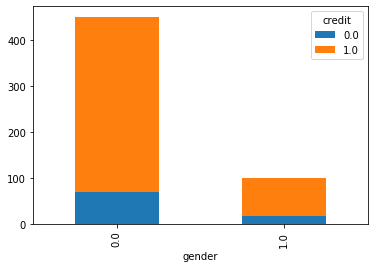

In [20]:
gender = train.groupby('gender')['credit'].value_counts().unstack()
print(gender)
gender.plot.bar(stacked=True)

In [21]:
print('Male',382 / (382 + 69))
print('Female',84 / (84 + 17))

Male 0.8470066518847007
Female 0.8316831683168316


property  Rural  Semiurban  Urban
gender                           
0.0         151        172    166
1.0          24         55     33


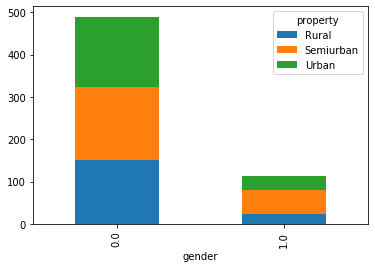

In [22]:
gender = train.groupby('gender')['property'].value_counts().unstack()
print(gender)
gender.plot.bar(stacked=True)

In [23]:
print('Male Urban',166 / (166 + 172 + 151))
print('Female Urban',33 / (33 + 55 + 24))

Male Urban 0.3394683026584867
Female Urban 0.29464285714285715


In [24]:
print(train[train['gender'] == 0].loanterm.describe())
print(train[train['gender'] == 1].loanterm.describe())

count    478.000000
mean     339.665272
std       67.089140
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: loanterm, dtype: float64
count    109.000000
mean     352.293578
std       56.722081
min       36.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: loanterm, dtype: float64


In [25]:
print(train[train['gender'] == 0].appin.describe())
print(train[train['gender'] == 1].appin.describe())

count      489.000000
mean      5446.460123
std       6185.789262
min        150.000000
25%       2917.000000
50%       3865.000000
75%       5923.000000
max      81000.000000
Name: appin, dtype: float64
count      112.000000
mean      4643.473214
std       3585.381488
min        210.000000
25%       2661.500000
50%       3583.000000
75%       4606.500000
max      19484.000000
Name: appin, dtype: float64


We can infer that Income > 19,484 (or 20,000) are mostly probably males

In [26]:
train[train['appin'] > 20000].gender.replace({np.nan : 0})

train.gender.isnull().sum()

13

Above inference was useless (did not erase any null)

In [27]:
print(train[train['gender'] == 0].coappin.describe())
print(train[train['gender'] == 1].coappin.describe())

count      489.000000
mean      1742.932352
std       2606.507054
min          0.000000
25%          0.000000
50%       1430.000000
75%       2436.000000
max      33837.000000
Name: coappin, dtype: float64
count      112.000000
mean      1108.008929
std       4094.595514
min          0.000000
25%          0.000000
50%          0.000000
75%       1635.000000
max      41667.000000
Name: coappin, dtype: float64


There is a very unhealthy behavior in female coapplicant income

In [28]:
print('Male',(len(train[(train['coappin'] == 0) & (train['gender'] == 0)])) / (len(train[train.gender == 0])))
print('female',len(train[(train['coappin'] == 0) & (train['gender'] == 1)]) / len(train[train.gender == 1]))

Male 0.39059304703476483
female 0.6785714285714286


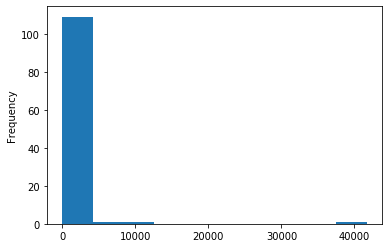

In [29]:
train[train['gender'] == 1].coappin.plot.hist()

In [30]:
train[(train['coappin'] >30000) & (train['gender'] == 1)].gender.value_counts()

1.0    1
Name: gender, dtype: int64

Encountered an Outlier!!!

In [31]:
train[(train['coappin'] >30000) & (train['gender'] == 1)]

,id,gender,married,family,education,selfemployed,appin,coappin,loanam,loanterm,credit,property,status
600,LP002949,1.0,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,0


Even the loan status is '0'!

Let's drop the row

In [32]:
print(train.shape)
train.drop([600], axis=0, inplace=True)
print(train.shape)

(614, 13)
(613, 13)


In [33]:
print(train[train['gender'] == 0].loanam.describe())
print(train[train['gender'] == 1].loanam.describe())

count    470.000000
mean     149.265957
std       82.810851
min       17.000000
25%      104.000000
50%      130.000000
75%      175.000000
max      650.000000
Name: loanam, dtype: float64
count    108.000000
mean     124.629630
std       76.646975
min        9.000000
25%       87.000000
50%      113.000000
75%      137.250000
max      600.000000
Name: loanam, dtype: float64


In [34]:
train[train['loanam'] > 650]

,id,gender,married,family,education,selfemployed,appin,coappin,loanam,loanterm,credit,property,status
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,1


We have LP001585 with maximum income and loan status 1!!!

Let's apply Probability:

married (Yes) --> male

family (3+) --> male

eduaction (Graduate) --> female

selfemployed (No) --> male

appin(>650) --> male

coappin(0) --> female

loanam(>650) --> male

loanterm(300) --> male (mean)

credit(1) --> male

property(Urban) --> male


HENCE IT'S A MALE!!!

In [35]:
train.iloc[171, train.columns.get_loc('gender')] = 0

train[train['loanam'] > 650]

print(train.gender.isnull().sum())

12


status    0    1
family          
0       107  238
1        36   66
2        25   76
3+       17   33


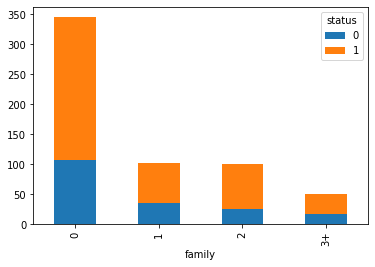

In [36]:
gender = train.groupby('family')['status'].value_counts().unstack()
print(gender)
gender.plot.bar(stacked=True)

In [37]:
print(train[train['gender'] == 0].loanterm.describe())
print(train[train['gender'] == 1].loanterm.describe())

count    479.000000
mean     339.582463
std       67.043427
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: loanterm, dtype: float64
count    108.000000
mean     353.888889
std       54.474436
min       36.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: loanterm, dtype: float64


## married

In [38]:
train.married.value_counts()

Yes    398
No     212
Name: married, dtype: int64

status     0    1
married          
No        78  134
Yes      113  285


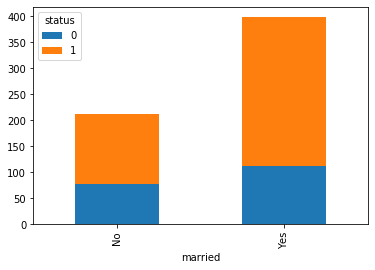

In [39]:
married = train.groupby('married')['status'].value_counts().unstack()
print(married)
married.plot.bar(stacked=True)

In [40]:
print('married',134 / (134 + 78))
print('unmarried',285 / (285 + 113))

married 0.6320754716981132
unmarried 0.7160804020100503


In [41]:
train['married'].replace({'Yes' : 1, 'No' : 0}, inplace = True)

gender   0.0  1.0
married          
0.0      130   79
1.0      358   31


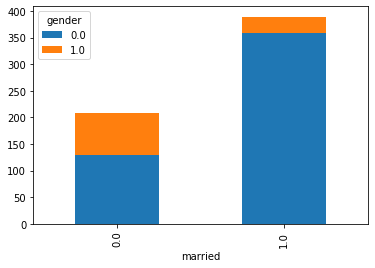

In [42]:
married = train.groupby('married')['gender'].value_counts().unstack()
print(married)
married.plot.bar(stacked=True)

In [43]:
print('Male',79 / (79 + 130))
print('Female',31 / (31 + 358))

Male 0.37799043062200954
Female 0.07969151670951156


family     0   1   2  3+
married                 
0.0      171  23   8   6
1.0      174  79  93  44


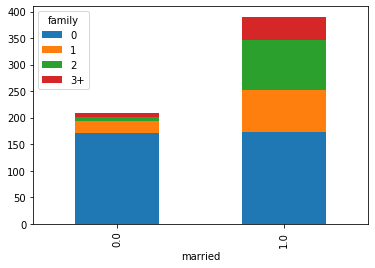

In [44]:
married = train.groupby('married')['family'].value_counts().unstack()
print(married)
married.plot.bar(stacked=True)

education  Graduate  Not Graduate
married                          
0.0             167            45
1.0             309            89


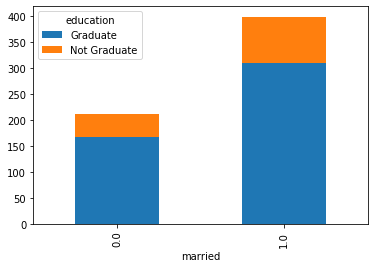

In [45]:
married = train.groupby('married')['education'].value_counts().unstack()
print(married)
married.plot.bar(stacked=True)

selfemployed   No  Yes
married               
0.0           171   28
1.0           326   54


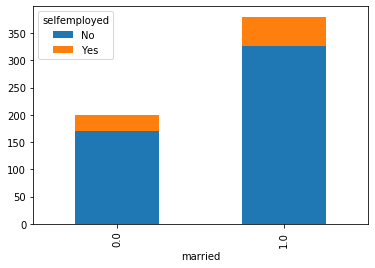

In [46]:
married = train.groupby('married')['selfemployed'].value_counts().unstack()
print(married)
married.plot.bar(stacked=True)

In [47]:
print(train[train['married'] == 0].appin.describe())
print(train[train['married'] == 1].appin.describe())

count      212.000000
mean      4991.867925
std       4001.487962
min        645.000000
25%       2924.500000
50%       3750.000000
75%       5417.000000
max      37719.000000
Name: appin, dtype: float64
count      398.000000
mean      5629.173367
std       6989.254425
min        150.000000
25%       2817.500000
50%       3854.500000
75%       5820.500000
max      81000.000000
Name: appin, dtype: float64


In [48]:
train[(train['married'] != 1) & (train['married'] != 0)]

,id,gender,married,family,education,selfemployed,appin,coappin,loanam,loanterm,credit,property,status
104,LP001357,0.0,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,1
228,LP001760,0.0,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,1
435,LP002393,1.0,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,1


This is very suspicious outcome

because all LP001357, LP001760, LP002393 have loan approved even though

coapplicant income is negligible

Looking at this data we can infer that 'married', 'family', 'coappin', 'loanam' are not good considerable parameters 

In [49]:
print(train[train['married'] == 0].coappin.describe())
print(train[train['married'] == 1].coappin.describe())

count      212.000000
mean      1126.226415
std       3019.208384
min          0.000000
25%          0.000000
50%          0.000000
75%       1733.500000
max      33837.000000
Name: coappin, dtype: float64
count      398.000000
mean      1794.632965
std       2039.962354
min          0.000000
25%          0.000000
50%       1625.000000
75%       2464.000000
max      20000.000000
Name: coappin, dtype: float64


In [50]:
print(train[train['married'] == 0].loanam.describe())
print(train[train['married'] == 1].loanam.describe())

count    205.000000
mean     127.804878
std       72.935312
min        9.000000
25%       88.000000
50%      115.000000
75%      144.000000
max      650.000000
Name: loanam, dtype: float64
count    384.000000
mean     155.750000
std       89.934267
min       17.000000
25%      108.000000
50%      132.000000
75%      178.500000
max      700.000000
Name: loanam, dtype: float64


In [51]:
print(train[train['married'] == 0].loanterm.describe())
print(train[train['married'] == 1].loanterm.describe())

count    207.000000
mean     351.942029
std       59.353773
min       36.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: loanterm, dtype: float64
count    389.000000
mean     336.987147
std       66.739163
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: loanterm, dtype: float64


credit   0.0  1.0
married          
0.0       32  167
1.0       57  305


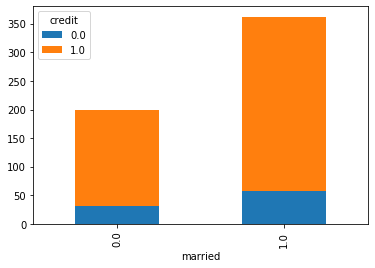

In [52]:
married = train.groupby('married')['credit'].value_counts().unstack()
print(married)
married.plot.bar(stacked=True)

In [53]:
print('married',305 / (305 + 57))
print('unmarried',167 / (167 + 32))

married 0.8425414364640884
unmarried 0.8391959798994975


property  Rural  Semiurban  Urban
married                          
0.0          63         80     69
1.0         116        151    131


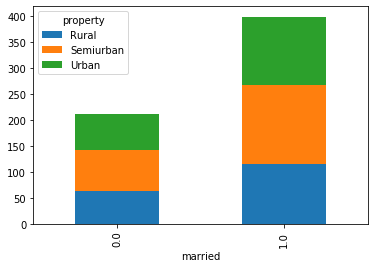

In [54]:
married = train.groupby('married')['property'].value_counts().unstack()
print(married)
married.plot.bar(stacked=True)

## family

In [55]:
train.family.replace({'3+' : 3}, inplace=True)
train.family = train.family.astype(float)

train.family.dtypes

dtype('float64')

In [56]:
train.family = train.family.apply(lambda x : x + 1)

train.family.value_counts()

1.0    345
2.0    102
3.0    101
4.0     50
Name: family, dtype: int64

gender  0.0  1.0
family          
1.0     258   80
2.0      82   19
3.0      92    7
4.0      46    2


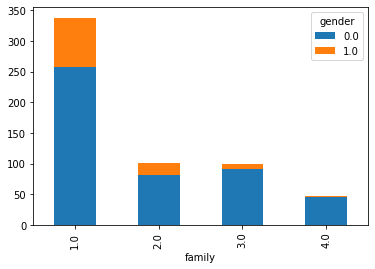

In [57]:
family = train.groupby('family')['gender'].value_counts().unstack()
print(family)
family.plot.bar(stacked=True)

married  0.0  1.0
family           
1.0      171  174
2.0       23   79
3.0        8   93
4.0        6   44


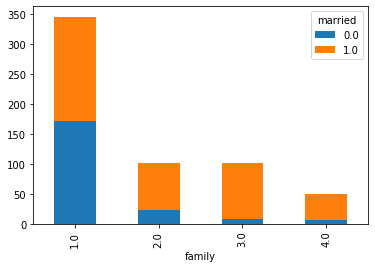

In [58]:
family = train.groupby('family')['married'].value_counts().unstack()
print(family)
family.plot.bar(stacked=True)

education  Graduate  Not Graduate
family                           
1.0             275            70
2.0              81            21
3.0              77            24
4.0              35            15


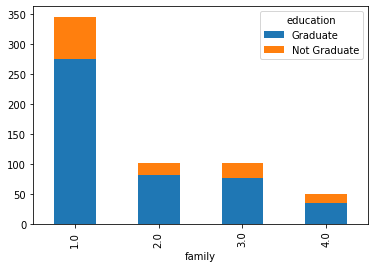

In [59]:
family = train.groupby('family')['education'].value_counts().unstack()
print(family)
family.plot.bar(stacked=True)

selfemployed   No  Yes
family                
1.0           289   37
2.0            76   20
3.0            80   16
4.0            42    7


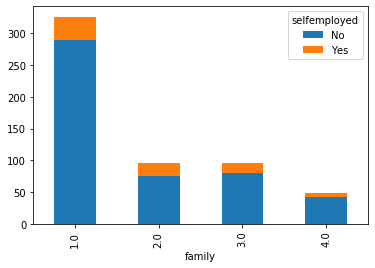

In [60]:
family = train.groupby('family')['selfemployed'].value_counts().unstack()
print(family)
family.plot.bar(stacked=True)

In [61]:
print(train[train['family'] == 1].appin.describe())
print(train[train['family'] == 2].appin.describe())
print(train[train['family'] == 3].appin.describe())
print(train[train['family'] == 4].appin.describe())

count      345.000000
mean      4917.423188
std       5029.420772
min        150.000000
25%       2600.000000
50%       3598.000000
75%       5417.000000
max      63337.000000
Name: appin, dtype: float64
count      102.000000
mean      5962.274510
std       5587.399149
min       1000.000000
25%       3054.500000
50%       4051.500000
75%       6556.000000
max      37719.000000
Name: appin, dtype: float64
count      101.000000
mean      4926.782178
std       3153.828577
min        210.000000
25%       3153.000000
50%       4006.000000
75%       5819.000000
max      17500.000000
Name: appin, dtype: float64
count       50.000000
mean      8744.520000
std      13691.463991
min       1830.000000
25%       3407.500000
50%       4699.000000
75%       6929.250000
max      81000.000000
Name: appin, dtype: float64


In [62]:
train[(train.family != 1) & (train.family != 2) & (train.family != 3) & (train.family != 4)]

,id,gender,married,family,education,selfemployed,appin,coappin,loanam,loanterm,credit,property,status
102,LP001350,0.0,1.0,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,1
104,LP001357,0.0,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,1
120,LP001426,0.0,1.0,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,1
226,LP001754,0.0,1.0,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,0
228,LP001760,0.0,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,1
293,LP001945,1.0,0.0,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,0
301,LP001972,0.0,1.0,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,1
332,LP002100,0.0,0.0,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,1
335,LP002106,0.0,1.0,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,1
346,LP002130,0.0,1.0,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,0


LP001350, LP002106 do NOT have "loan amount" still has an approved status!!!

LP002106 does NOT have "loan term" still has an approved status!!!

In [63]:
print(train[train['family'] == 1].coappin.describe())
print(train[train['family'] == 2].coappin.describe())
print(train[train['family'] == 3].coappin.describe())
print(train[train['family'] == 4].coappin.describe())

count      345.000000
mean      1623.696000
std       2630.540915
min          0.000000
25%          0.000000
50%       1330.000000
75%       2417.000000
max      33837.000000
Name: coappin, dtype: float64
count      102.000000
mean      1426.235294
std       1830.043127
min          0.000000
25%          0.000000
50%       1219.500000
75%       2072.750000
max      10968.000000
Name: coappin, dtype: float64
count      101.000000
mean      1687.245544
std       2556.268525
min          0.000000
25%          0.000000
50%       1387.000000
75%       2000.000000
max      20000.000000
Name: coappin, dtype: float64
count       50.000000
mean      1231.460000
std       2155.339721
min          0.000000
25%          0.000000
50%          0.000000
75%       1801.750000
max      11300.000000
Name: coappin, dtype: float64


In [64]:
print(train[train['family'] == 1].loanam.describe())
print(train[train['family'] == 2].loanam.describe())
print(train[train['family'] == 3].loanam.describe())
print(train[train['family'] == 4].loanam.describe())

count    334.000000
mean     135.886228
std       75.848072
min        9.000000
25%       96.500000
50%      120.000000
75%      155.000000
max      650.000000
Name: loanam, dtype: float64
count     98.000000
mean     158.622449
std       95.097402
min       26.000000
25%      106.250000
50%      139.000000
75%      178.750000
max      600.000000
Name: loanam, dtype: float64
count     98.000000
mean     150.224490
std       71.283018
min       17.000000
25%      108.250000
50%      133.000000
75%      186.500000
max      480.000000
Name: loanam, dtype: float64
count     48.000000
mean     187.583333
std      134.280880
min       40.000000
25%      100.000000
50%      130.000000
75%      213.750000
max      700.000000
Name: loanam, dtype: float64


In [65]:
print(train[train['family'] == 1].loanterm.describe())
print(train[train['family'] == 2].loanterm.describe())
print(train[train['family'] == 3].loanterm.describe())
print(train[train['family'] == 4].loanterm.describe())

count    334.000000
mean     348.107784
std       57.954215
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: loanterm, dtype: float64
count    101.000000
mean     329.346535
std       75.446993
min       36.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: loanterm, dtype: float64
count    101.000000
mean     340.871287
std       64.914970
min       84.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: loanterm, dtype: float64
count     49.000000
mean     328.163265
std       77.558405
min       60.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: loanterm, dtype: float64


credit  0.0  1.0
family          
1.0      45  271
2.0      14   76
3.0      14   81
4.0      11   37


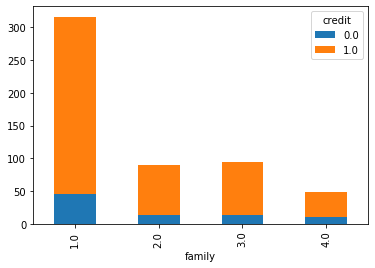

In [66]:
family = train.groupby('family')['credit'].value_counts().unstack()
print(family)
family.plot.bar(stacked=True)

property  Rural  Semiurban  Urban
family                           
1.0         109        130    106
2.0          21         40     41
3.0          29         37     35
4.0          18         20     12


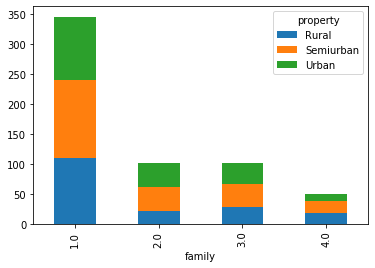

In [67]:
family = train.groupby('family')['property'].value_counts().unstack()
print(family)
family.plot.bar(stacked=True)

## education

In [68]:
train.education.value_counts()

Graduate        479
Not Graduate    134
Name: education, dtype: int64

In [69]:
train.education.replace({'Graduate' : 1, 'Not Graduate' : 0}, inplace=True)

train.education.value_counts()

1    479
0    134
Name: education, dtype: int64

In [70]:
def stack_bar(t,s):
    j = train.groupby(t)[s].value_counts().unstack()
    print(j)
    j.plot.bar(stacked=True)

gender     0.0  1.0
education          
0          113   20
1          377   91


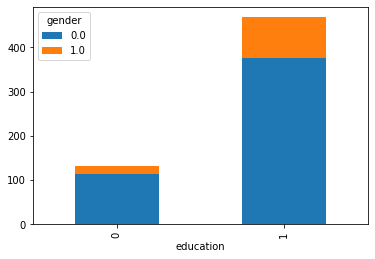

In [71]:
stack_bar("education", "gender")

married    0.0  1.0
education          
0           45   89
1          167  309


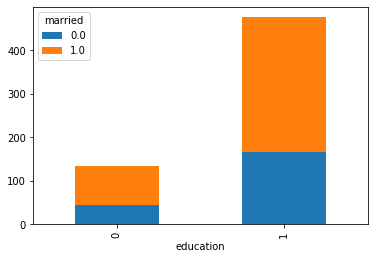

In [72]:
stack_bar("education", "married")

family     1.0  2.0  3.0  4.0
education                    
0           70   21   24   15
1          275   81   77   35


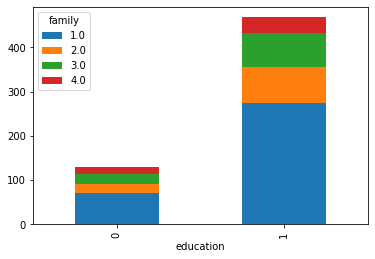

In [73]:
stack_bar("education", "family")

selfemployed   No  Yes
education             
0             111   17
1             389   65


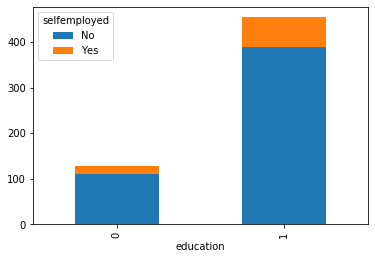

In [74]:
stack_bar("education", "selfemployed")

credit     0.0  1.0
education          
0           26   95
1           63  380
property   Rural  Semiurban  Urban
education                         
0             48         46     40
1            131        187    161


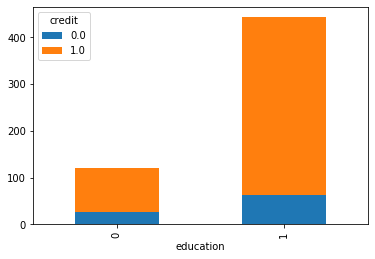

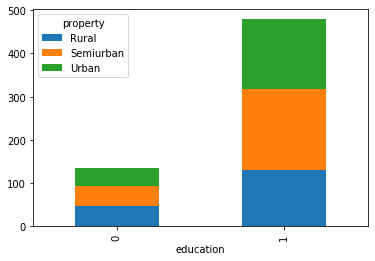

In [75]:
stack_bar("education", "credit")
stack_bar("education", "property")

In [76]:
print(train[train['education'] == 1].appin.describe())
print(train[train['education'] == 0].appin.describe())

count      479.000000
mean      5868.793319
std       6742.242530
min        150.000000
25%       3000.000000
50%       4000.000000
75%       6072.500000
max      81000.000000
Name: appin, dtype: float64
count      134.000000
mean      3777.283582
std       2237.081586
min        210.000000
25%       2583.000000
50%       3357.500000
75%       4333.000000
max      18165.000000
Name: appin, dtype: float64


In [77]:
print(train[train['education'] == 1].coappin.describe())
print(train[train['education'] == 0].coappin.describe())

count      479.000000
mean      1634.072902
std       2667.427807
min          0.000000
25%          0.000000
50%       1032.000000
75%       2334.500000
max      33837.000000
Name: coappin, dtype: float64
count     134.000000
mean     1276.544776
std      1310.343602
min         0.000000
25%         0.000000
50%      1356.500000
75%      2028.250000
max      7101.000000
Name: coappin, dtype: float64


In [78]:
print(train[train['education'] == 1].loanam.describe())
print(train[train['education'] == 0].loanam.describe())

count    464.000000
mean     153.637931
std       92.535688
min        9.000000
25%      103.000000
50%      131.500000
75%      176.000000
max      700.000000
Name: loanam, dtype: float64
count    127.000000
mean     118.409449
std       39.773636
min       25.000000
25%       96.500000
50%      115.000000
75%      133.000000
max      279.000000
Name: loanam, dtype: float64


In [79]:
print(train[train['education'] == 1].loanterm.describe())
print(train[train['education'] == 0].loanterm.describe())

count    471.000000
mean     345.019108
std       60.891931
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: loanterm, dtype: float64
count    128.000000
mean     332.156250
std       77.079613
min       36.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: loanterm, dtype: float64


## selfemployed

In [80]:
train.selfemployed.replace({'No' : 0, 'Yes' : 1}, inplace=True)

train.selfemployed.value_counts()

0.0    500
1.0     82
Name: selfemployed, dtype: int64

gender        0.0  1.0
selfemployed          
0.0           403   89
1.0            63   15
married       0.0  1.0
selfemployed          
0.0           171  326
1.0            28   54
family        1.0  2.0  3.0  4.0
selfemployed                    
0.0           289   76   80   42
1.0            37   20   16    7
education       0    1
selfemployed          
0.0           111  389
1.0            17   65
credit        0.0  1.0
selfemployed          
0.0            76  387
1.0            12   63
property      Rural  Semiurban  Urban
selfemployed                         
0.0             143        191    166
1.0              26         32     24


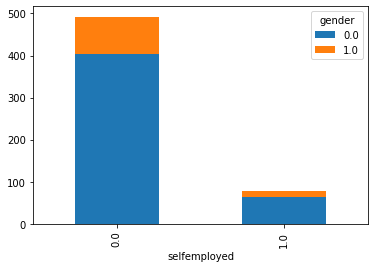

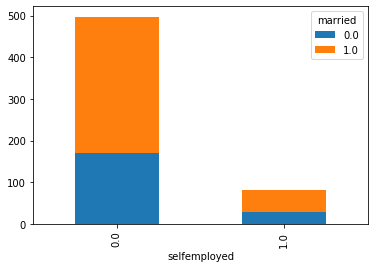

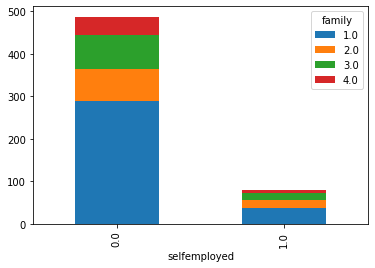

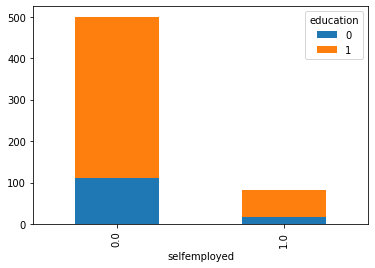

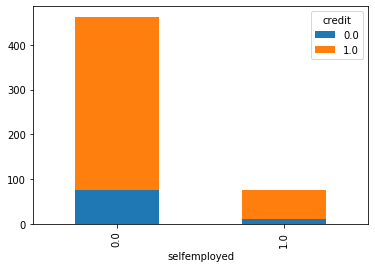

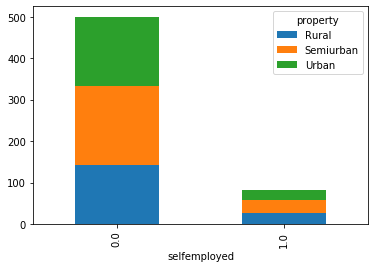

In [81]:
stack_bar("selfemployed", "gender")
stack_bar("selfemployed", "married")
stack_bar("selfemployed", "family")
stack_bar("selfemployed", "education")
stack_bar("selfemployed", "credit")
stack_bar("selfemployed", "property")

In [82]:
print(train[train['selfemployed'] == 1].appin.describe())
print(train[train['selfemployed'] == 0].appin.describe())

count       82.000000
mean      7380.817073
std       5883.564795
min        674.000000
25%       3452.250000
50%       5809.000000
75%       9348.500000
max      39147.000000
Name: appin, dtype: float64
count      500.00000
mean      5049.74800
std       5682.89581
min        150.00000
25%       2824.50000
50%       3705.50000
75%       5292.75000
max      81000.00000
Name: appin, dtype: float64


In [83]:
train[(train.selfemployed != 1) & (train.selfemployed != 0)]

,id,gender,married,family,education,selfemployed,appin,coappin,loanam,loanterm,credit,property,status
11,LP001027,0.0,1.0,3.0,1,NaN,2500,1840.0,109.0,360.0,1.0,Urban,1
19,LP001041,0.0,1.0,1.0,1,NaN,2600,3500.0,115.0,NaN,1.0,Urban,1
24,LP001052,0.0,1.0,2.0,1,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,0
29,LP001087,1.0,0.0,3.0,1,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,1
30,LP001091,0.0,1.0,2.0,1,NaN,4166,3369.0,201.0,360.0,NaN,Urban,0
95,LP001326,0.0,0.0,1.0,1,NaN,6782,0.0,NaN,360.0,NaN,Urban,0
107,LP001370,0.0,0.0,1.0,0,NaN,7333,0.0,120.0,360.0,1.0,Rural,0
111,LP001387,1.0,1.0,1.0,1,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,1
114,LP001398,0.0,0.0,1.0,1,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,1
158,LP001546,0.0,0.0,1.0,1,NaN,2980,2083.0,120.0,360.0,1.0,Rural,1


In [84]:
print(train[train['selfemployed'] == 1].coappin.describe())
print(train[train['selfemployed'] == 0].coappin.describe())

count       82.000000
mean      1501.341463
std       2780.713676
min          0.000000
25%          0.000000
50%          0.000000
75%       2164.500000
max      20000.000000
Name: coappin, dtype: float64
count      500.000000
mean      1580.989840
std       2438.161181
min          0.000000
25%          0.000000
50%       1293.500000
75%       2303.000000
max      33837.000000
Name: coappin, dtype: float64


In [85]:
print(train[train['selfemployed'] == 1].loanam.describe())
print(train[train['selfemployed'] == 0].loanam.describe())

count     79.00000
mean     172.00000
std      108.63465
min       25.00000
25%      106.00000
50%      150.00000
75%      189.00000
max      650.00000
Name: loanam, dtype: float64
count    482.000000
mean     141.748963
std       79.780919
min        9.000000
25%      100.000000
50%      125.000000
75%      161.750000
max      700.000000
Name: loanam, dtype: float64


In [86]:
print(train[train['selfemployed'] == 1].loanterm.describe())
print(train[train['selfemployed'] == 0].loanterm.describe())

count     80.00000
mean     336.30000
std       69.39529
min       60.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: loanterm, dtype: float64
count    489.000000
mean     343.263804
std       64.696881
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: loanterm, dtype: float64


## appin

In [87]:
train.appin.value_counts().sum()

613

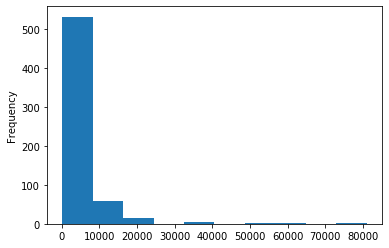

In [88]:
train.appin.plot.hist()

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

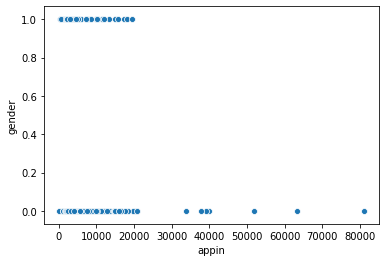

In [90]:
sns.scatterplot(x = train.appin, y = train.gender)

Hence Income > 19,484 are males!!!

(Check the gender ^)

In [91]:
train[(train.gender != 1) & (train.gender != 0)]

,id,gender,married,family,education,selfemployed,appin,coappin,loanam,loanterm,credit,property,status
23,LP001050,NaN,1.0,3.0,0,0.0,3365,1917.0,112.0,360.0,0.0,Rural,0
126,LP001448,NaN,1.0,4.0,1,0.0,23803,0.0,370.0,360.0,1.0,Rural,1
188,LP001644,NaN,1.0,1.0,1,1.0,674,5296.0,168.0,360.0,1.0,Rural,1
314,LP002024,NaN,1.0,1.0,1,0.0,2473,1843.0,159.0,360.0,1.0,Rural,0
334,LP002103,NaN,1.0,2.0,1,1.0,9833,1833.0,182.0,180.0,1.0,Urban,1
460,LP002478,NaN,1.0,1.0,1,1.0,2083,4083.0,160.0,360.0,NaN,Semiurban,1
467,LP002501,NaN,1.0,1.0,1,0.0,16692,0.0,110.0,360.0,1.0,Semiurban,1
477,LP002530,NaN,1.0,3.0,1,0.0,2873,1872.0,132.0,360.0,0.0,Semiurban,0
507,LP002625,NaN,0.0,1.0,1,0.0,3583,0.0,96.0,360.0,1.0,Urban,0
576,LP002872,NaN,1.0,1.0,1,0.0,3087,2210.0,136.0,360.0,0.0,Semiurban,0


In [92]:
train.iloc[126, train.columns.get_loc('gender')] = 0

train.gender.isnull().sum()

11

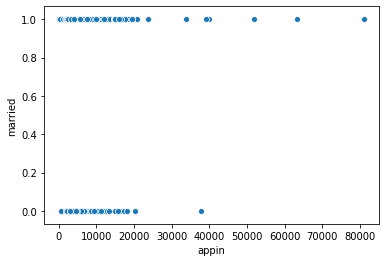

In [93]:
sns.scatterplot(x = train.appin, y = train.married)

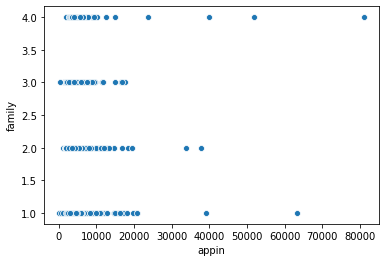

In [94]:
sns.scatterplot(x = train.appin, y = train.family)

In [95]:
train[(train.family == 1) & (train.appin > 30000)]

,id,gender,married,family,education,selfemployed,appin,coappin,loanam,loanterm,credit,property,status
185,LP001640,0.0,1.0,1.0,1,1.0,39147,4750.0,120.0,360.0,1.0,Semiurban,1
333,LP002101,0.0,1.0,1.0,1,NaN,63337,0.0,490.0,180.0,1.0,Urban,1


These are certainly outliers!!!

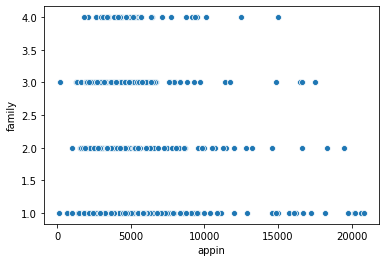

In [96]:
sns.scatterplot(x = train[(train.appin < 22000)].appin, y = train.family)

In [97]:
train = train[train.appin < 22000]

We just got rid of the outlier!!!

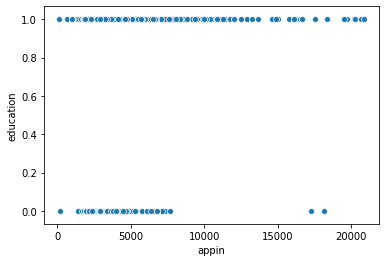

In [98]:
sns.scatterplot(x = train.appin, y = train.education)

There are 2 outliers for Non educated 

In [99]:
train[(train.education == 0) & (train.appin > 15000)]

,id,gender,married,family,education,selfemployed,appin,coappin,loanam,loanterm,credit,property,status
493,LP002582,1.0,0.0,1.0,0,1.0,17263,0.0,225.0,360.0,1.0,Semiurban,1
534,LP002731,1.0,0.0,1.0,0,1.0,18165,0.0,125.0,360.0,1.0,Urban,1


LP002731, LP002582 are outliers!!!


In [100]:
train.drop([493, 534], inplace=True)

train[(train.education == 0) & (train.appin > 15000)]

,id,gender,married,family,education,selfemployed,appin,coappin,loanam,loanterm,credit,property,status


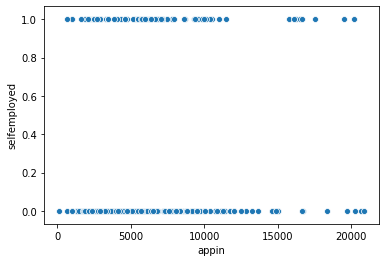

In [101]:
sns.scatterplot(x = train.appin, y = train.selfemployed)

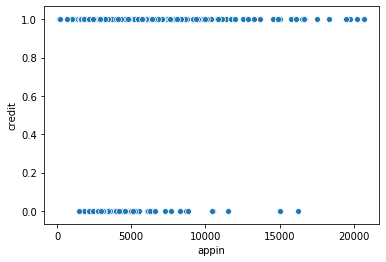

In [102]:
sns.scatterplot(x = train.appin, y = train.credit)

In [103]:
train = train[~((train.credit == 0) & (train.appin > 10000))]

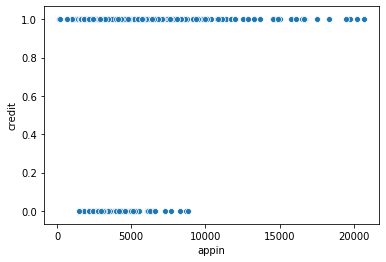

In [104]:
sns.scatterplot(x = train.appin, y = train.credit)

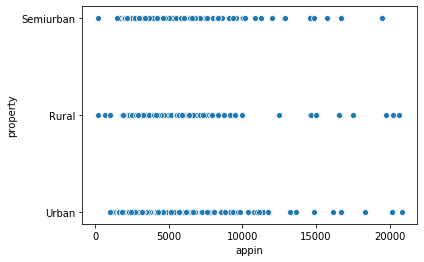

In [105]:
sns.scatterplot(x = train.appin, y = train.property)

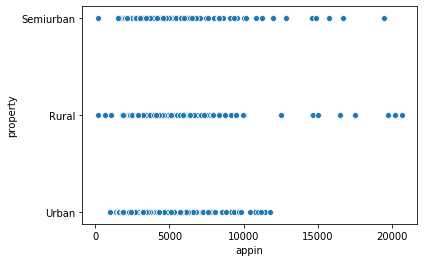

In [106]:
train = train[~((train.property == 'Urban') & (train.appin > 12500))]

sns.scatterplot(x = train.appin, y = train.property)

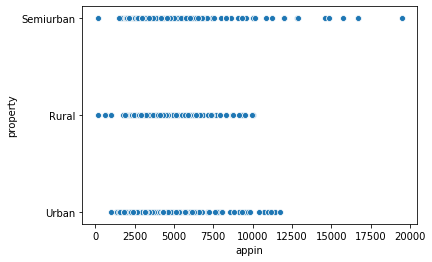

In [107]:
train = train[~((train.property == 'Rural') & (train.appin > 12000))]

sns.scatterplot(x = train.appin, y = train.property)

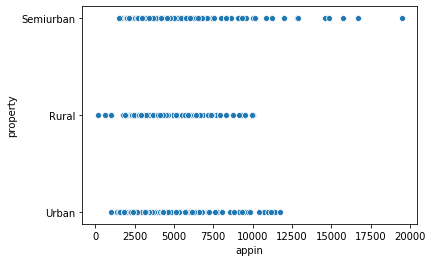

In [108]:
train = train[~((train.property == 'Semiurban') & (train.appin < 600))]

sns.scatterplot(x = train.appin, y = train.property)

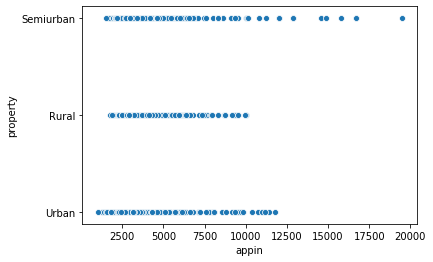

In [109]:
train = train[~((train.property == 'Rural') & (train.appin < 1100))]

sns.scatterplot(x = train.appin, y = train.property)

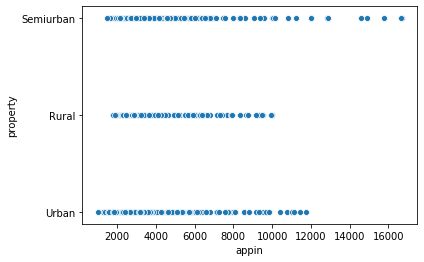

In [110]:
train = train[~((train.property == 'Semiurban') & (train.appin > 18000))]

sns.scatterplot(x = train.appin, y = train.property)

## coappin

In [111]:
train.coappin.value_counts().sum()

574

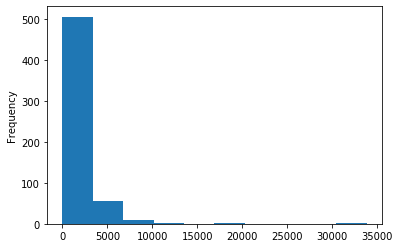

In [112]:
train.coappin.plot.hist()

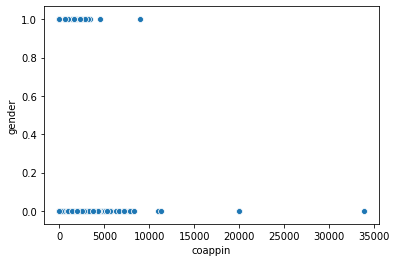

In [113]:
sns.scatterplot(x = train.coappin, y = train.gender)

In [114]:
train[((train.coappin >10000) & (train.gender == 0)) | ((train.coappin > 7500) & (train.gender == 1))]

,id,gender,married,family,education,selfemployed,appin,coappin,loanam,loanterm,credit,property,status
9,LP001020,0.0,1.0,2.0,1,0.0,12841,10968.0,349.0,360.0,1.0,Semiurban,0
122,LP001431,1.0,0.0,1.0,1,0.0,2137,8980.0,137.0,360.0,0.0,Semiurban,1
177,LP001610,0.0,1.0,4.0,1,0.0,5516,11300.0,495.0,360.0,0.0,Semiurban,0
402,LP002297,0.0,0.0,1.0,1,0.0,2500,20000.0,103.0,360.0,1.0,Semiurban,1
417,LP002342,0.0,1.0,3.0,1,1.0,1600,20000.0,239.0,360.0,1.0,Urban,0
581,LP002893,0.0,0.0,1.0,1,0.0,1836,33837.0,90.0,360.0,1.0,Urban,0


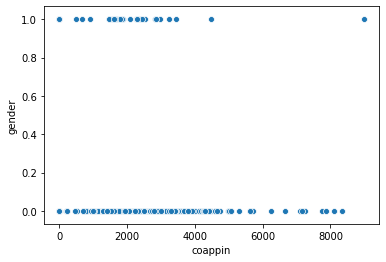

In [115]:
train = train[~((train.gender == 0) & (train.coappin > 10000))]

sns.scatterplot(x = train.coappin, y = train.gender)

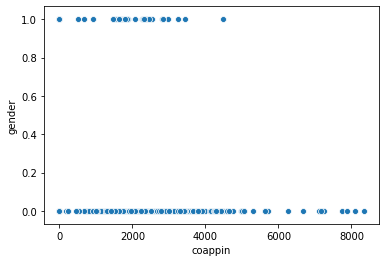

In [116]:
train = train[~((train.gender == 1) & (train.coappin > 8000))]

sns.scatterplot(x = train.coappin, y = train.gender)

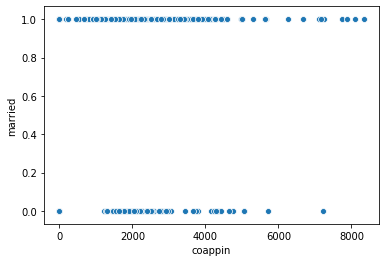

In [117]:
sns.scatterplot(x = train.coappin, y = train.married)

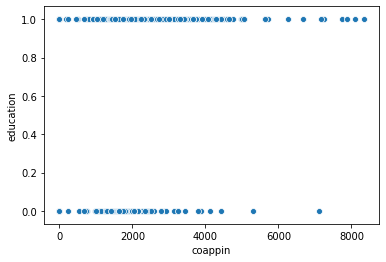

In [118]:
sns.scatterplot(x = train.coappin, y = train.education)

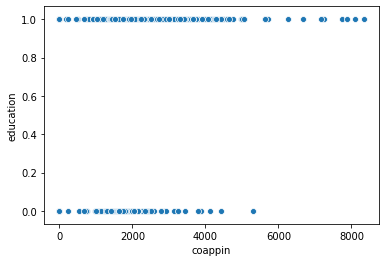

In [119]:
train = train[~((train.education == 0) & (train.coappin > 6000))]

sns.scatterplot(x = train.coappin, y = train.education)

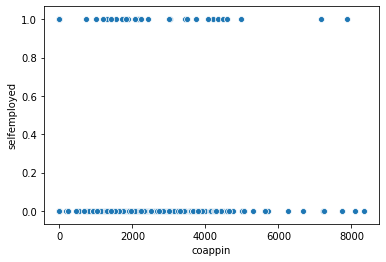

In [120]:
sns.scatterplot(x = train.coappin, y = train.selfemployed)

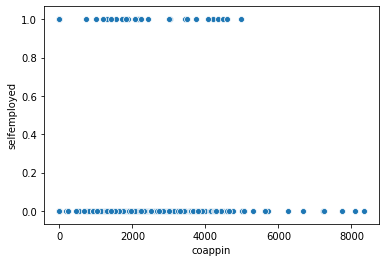

In [121]:
train = train[~((train.selfemployed == 1) & (train.coappin > 6000))]

sns.scatterplot(x = train.coappin, y = train.selfemployed)

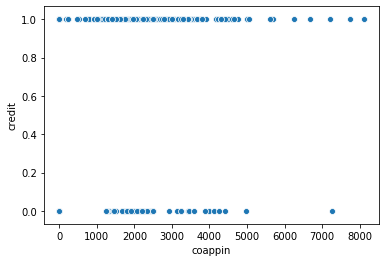

In [122]:
sns.scatterplot(x = train.coappin, y = train.credit)

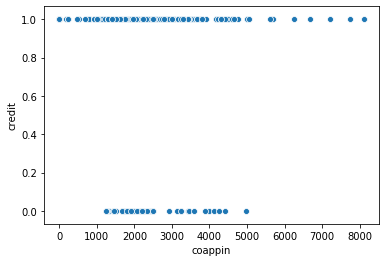

In [123]:
train = train[~(((train.credit == 0) & (train.coappin > 6000)) | (((train.credit == 0) & (train.coappin < 100))))]

sns.scatterplot(x = train.coappin, y = train.credit)

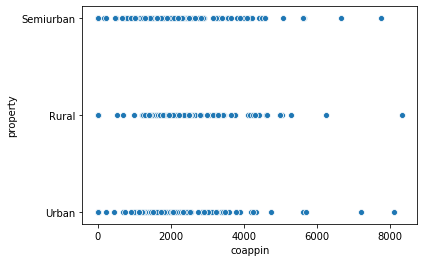

In [124]:
sns.scatterplot(x = train.coappin, y = train.property)

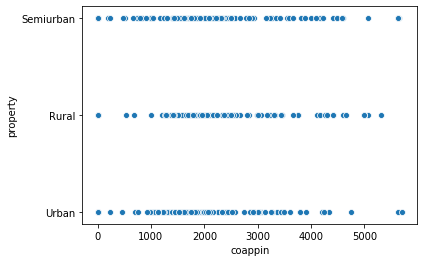

In [125]:
train = train[~(((train.property == 'Urban') & (train.coappin > 6000)) 
                | (((train.property == 'Rural') & (train.coappin > 6000)))
                | (((train.property == 'Semiurban') & (train.coappin > 6000))))]

sns.scatterplot(x = train.coappin, y = train.property)

## loanam

In [126]:
train[train.loanam.isna()]

,id,gender,married,family,education,selfemployed,appin,coappin,loanam,loanterm,credit,property,status
0,LP001002,0.0,0.0,1.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,1
35,LP001106,0.0,1.0,1.0,1,0.0,2275,2067.0,NaN,360.0,1.0,Urban,1
81,LP001266,0.0,1.0,2.0,1,1.0,2395,0.0,NaN,360.0,1.0,Semiurban,1
95,LP001326,0.0,0.0,1.0,1,NaN,6782,0.0,NaN,360.0,NaN,Urban,0
103,LP001356,0.0,1.0,1.0,1,0.0,4652,3583.0,NaN,360.0,1.0,Semiurban,1
113,LP001392,1.0,0.0,2.0,1,1.0,7451,0.0,NaN,360.0,1.0,Semiurban,1
127,LP001449,0.0,0.0,1.0,1,0.0,3865,1640.0,NaN,360.0,1.0,Rural,1
202,LP001682,0.0,1.0,4.0,0,0.0,3992,0.0,NaN,180.0,1.0,Urban,0
305,LP001990,0.0,0.0,1.0,0,0.0,2000,0.0,NaN,360.0,1.0,Urban,0
322,LP002054,0.0,1.0,3.0,0,0.0,3601,1590.0,NaN,360.0,1.0,Rural,1


These are obviously wrong predictions to give loan without knowing loan amount

In [127]:
train = train[~train.loanam.isna()]

train[train.loanam.isna()]

,id,gender,married,family,education,selfemployed,appin,coappin,loanam,loanterm,credit,property,status


## loanterm

In [128]:
train[train.loanterm.isna()]

,id,gender,married,family,education,selfemployed,appin,coappin,loanam,loanterm,credit,property,status
19,LP001041,0.0,1.0,1.0,1,NaN,2600,3500.0,115.0,NaN,1.0,Urban,1
36,LP001109,0.0,1.0,1.0,1,0.0,1828,1330.0,100.0,NaN,0.0,Urban,0
44,LP001136,0.0,1.0,1.0,0,1.0,4695,0.0,96.0,NaN,1.0,Urban,1
45,LP001137,1.0,0.0,1.0,1,0.0,3410,0.0,88.0,NaN,1.0,Urban,1
112,LP001391,0.0,1.0,1.0,0,0.0,3572,4114.0,152.0,NaN,0.0,Rural,0
165,LP001574,0.0,1.0,1.0,1,0.0,3707,3166.0,182.0,NaN,1.0,Rural,1
197,LP001669,1.0,0.0,1.0,0,0.0,1907,2365.0,120.0,NaN,1.0,Urban,1
223,LP001749,0.0,1.0,1.0,1,0.0,7578,1010.0,175.0,NaN,1.0,Semiurban,1
232,LP001770,0.0,0.0,1.0,0,0.0,3189,2598.0,120.0,NaN,1.0,Rural,1
335,LP002106,0.0,1.0,NaN,1,1.0,5503,4490.0,70.0,NaN,1.0,Semiurban,1


In [129]:
train = train[~train.loanterm.isna()]

train[train.loanterm.isna()]

,id,gender,married,family,education,selfemployed,appin,coappin,loanam,loanterm,credit,property,status


## credit

In [130]:
train.credit.replace({np.nan : 0}, inplace = True)

train.credit.isnull().sum()

0

## property

In [131]:
train.property.replace({'Urban' : 1, 'Semiurban' : 2, 'Rural' : 3})

train.property.value_counts()

Semiurban    197
Urban        157
Rural        141
Name: property, dtype: int64

In [132]:
Final = train.copy()

In [133]:
Final.to_csv('Final_train.csv', index = True)